In [3]:
import pandas 
import seaborn
import matplotlib.pyplot as plt 
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipotle_data = pandas.read_csv(url, sep = '\t')
chipotle_data.head()



,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [6]:
chipotle_data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [8]:
chipotle_data.groupby("item_name").agg({
    "quantity": "sum"
}).sort_values("quantity", ascending = False) [:1]

,quantity
item_name,
Chicken Bowl,761


In [9]:
chipotle_data['item_price'] = chipotle_data['item_price'].replace('[\$]', '', regex=True).astype(float)
revenue = (chipotle_data['quantity'] * chipotle_data['item_price']).sum()

print(f"Total Revenue: ${revenue:.2f}")

Total Revenue: $39237.02


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/05/xg7lz7vs0glfp_csb2xvht0c0000gn/T/ipykernel_94074/4152771712.py:1: SyntaxWarning: invalid escape sequence '\$'
  chipotle_data['item_price'] = chipotle_data['item_price'].replace('[\$]', '', regex=True).astype(float)


In [15]:
total_order = (chipotle_data["quantity"]).sum()
print("chipotle's total order =", total_order)

chipotle's total order = 4972


In [29]:
item_more_than_10 = chipotle_data[chipotle_data["item_price"] > 10]
print("item over 10:", item_more_than_10)

item over 10:       order_id  quantity           item_name  \
4            2         2        Chicken Bowl   
5            3         1        Chicken Bowl   
7            4         1       Steak Burrito   
13           7         1        Chicken Bowl   
23          12         1     Chicken Burrito   
...        ...       ...                 ...   
4610      1830         1       Steak Burrito   
4611      1830         1      Veggie Burrito   
4617      1833         1       Steak Burrito   
4618      1833         1       Steak Burrito   
4619      1834         1  Chicken Salad Bowl   

                                     choice_description  item_price  
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
5     [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...       10.98  
7     [Tomatillo Red Chili Salsa, [Fajita Vegetables...       11.75  
13    [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       11.25  
23    [[Tomatillo-Green Chili Salsa (Medium), Tomati...    

In [31]:
unique_item = chipotle_data["item_name"].unique()
print(unique_item)

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted Chili-Corn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and Tomatillo-Red Chili Salsa' 'Bowl'
 'Burrito' 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl' 'Salad' 'Veggie Cris

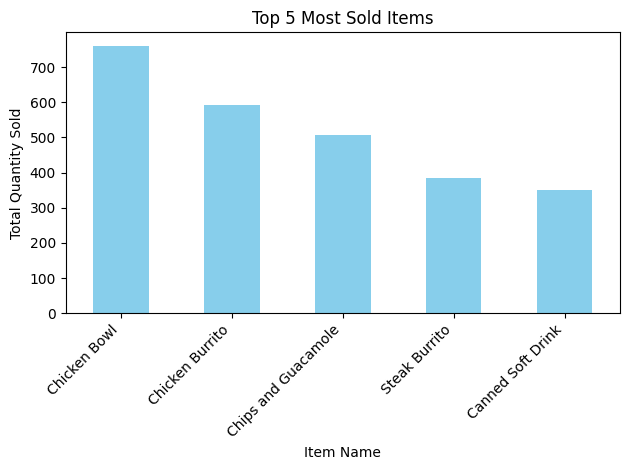

In [42]:
top_5 = (
    chipotle_data
    .groupby("item_name")
    .agg({"quantity": "sum"})
    .sort_values("quantity", ascending=False)
    .head(5)
)

top_5.plot(
    kind="bar",
    color="skyblue",
    legend=False
    
)

plt.title("Top 5 Most Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
top_10_orders = chipotle_data.groupby("item_name")[]